### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

### Importing cleaned dataset

In [2]:
# Importing cleaned dataset and dropping old index

retail = pd.read_csv('./dataset/retail.csv')
retail = retail.drop('Unnamed: 0', axis=1)
retail.head()

,Branch,Product line,Unit price,Quantity,Total,Rating,Datetime,Hour
0,A,Health and beauty,74.69,7,548.9715,9.1,2019-01-05 13:08:00,13
1,C,Electronic accessories,15.28,5,80.2200,9.6,2019-03-08 10:29:00,10
2,A,Home and lifestyle,46.33,7,340.5255,7.4,2019-03-03 13:23:00,13
3,A,Health and beauty,58.22,8,489.0480,8.4,2019-01-27 20:33:00,20
4,A,Sports and travel,86.31,7,634.3785,5.3,2019-02-08 10:37:00,10


### First insights

### Numeric columns

In [3]:
retail.describe()

,Unit price,Quantity,Total,Rating,Hour
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,322.966749,6.97270,14.910000
std,26.494628,2.923431,245.885335,1.71858,3.186857
min,10.080000,1.000000,10.678500,4.00000,10.000000
25%,32.875000,3.000000,124.422375,5.50000,12.000000
50%,55.230000,5.000000,253.848000,7.00000,15.000000
75%,77.935000,8.000000,471.350250,8.50000,18.000000
max,99.960000,10.000000,1042.650000,10.00000,20.000000


#### First insights:
- The mean is most of the time closed to the median which shows that the data is concentrated around the mean.
- Unit price (in USD): between 10.08 to 99.96 with an average of 55.67
- Quantity: between 1 and 10 with a median of 5 - the buyers don't buy many articles at once
- Total spent (in USD): between 10ish to 1042.65 with an average of 322.97, the standard deviation is also really high which shows possible outliers
- Ratings: between 4 and 10 with a mean of 6.97

#### Looking for outliers

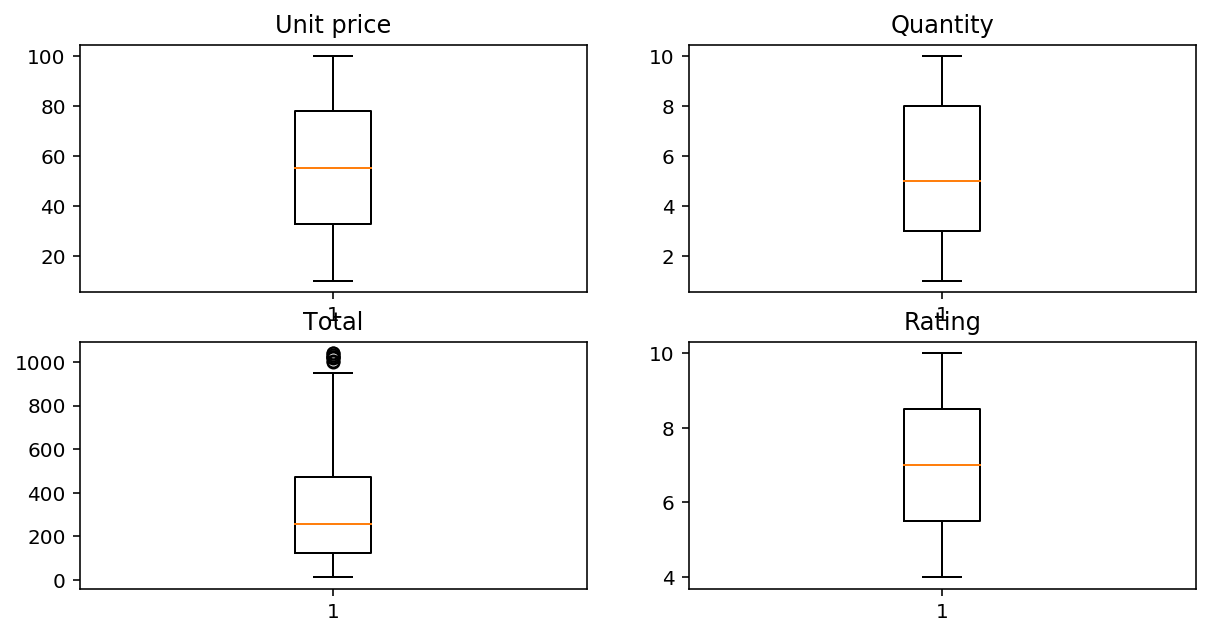

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (10,5))

axs[0, 0].boxplot(x = retail['Unit price'])
axs[0, 0].set_title('Unit price')

axs[0, 1].boxplot(x = retail['Quantity'])
axs[0, 1].set_title('Quantity')


axs[1, 0].boxplot(x = retail['Total'])
axs[1, 0].set_title('Total')

axs[1, 1].boxplot(x = retail['Rating'])
axs[1, 1].set_title('Rating')

plt.show()

##### Price column: cleaning outliers

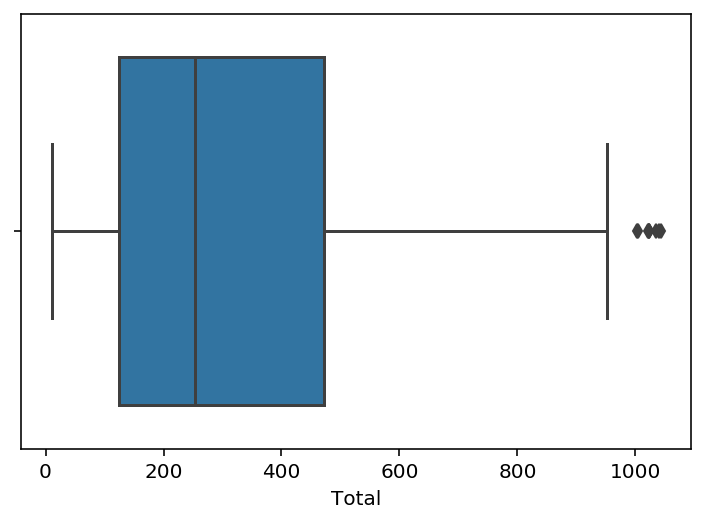

In [5]:
sns.boxplot(x = retail['Total'])
plt.show()

In [6]:
Q1 = retail['Total'].quantile(0.25)
Q3 = retail['Total'].quantile(0.75)
IQR = Q3 - Q1

retail['Total'] = retail['Total'][~((retail['Total'] < (Q1 - 1.5 * IQR)) | 
                                    (retail['Total'] > (Q3 + 1.5 * IQR)))]

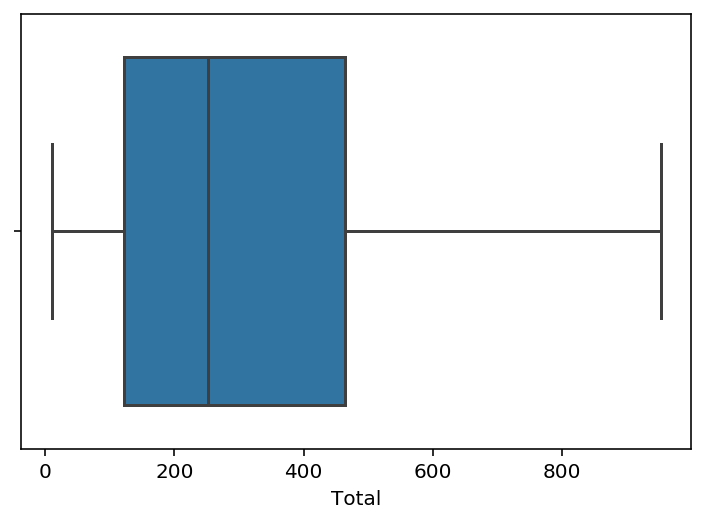

In [7]:
sns.boxplot(x = retail['Total'])
plt.show()

In [9]:
retail.describe()

,Unit price,Quantity,Total,Rating,Hour
count,1000.000000,1000.000000,991.000000,1000.00000,1000.000000
mean,55.672130,5.510000,316.604752,6.97270,14.910000
std,26.494628,2.923431,237.709589,1.71858,3.186857
min,10.080000,1.000000,10.678500,4.00000,10.000000
25%,32.875000,3.000000,122.167500,5.50000,12.000000
50%,55.230000,5.000000,252.756000,7.00000,15.000000
75%,77.935000,8.000000,464.667000,8.50000,18.000000
max,99.960000,10.000000,951.825000,10.00000,20.000000


### 1. Is the customer behavior different depending on the branches?

NameError: name 'retail_original' is not defined

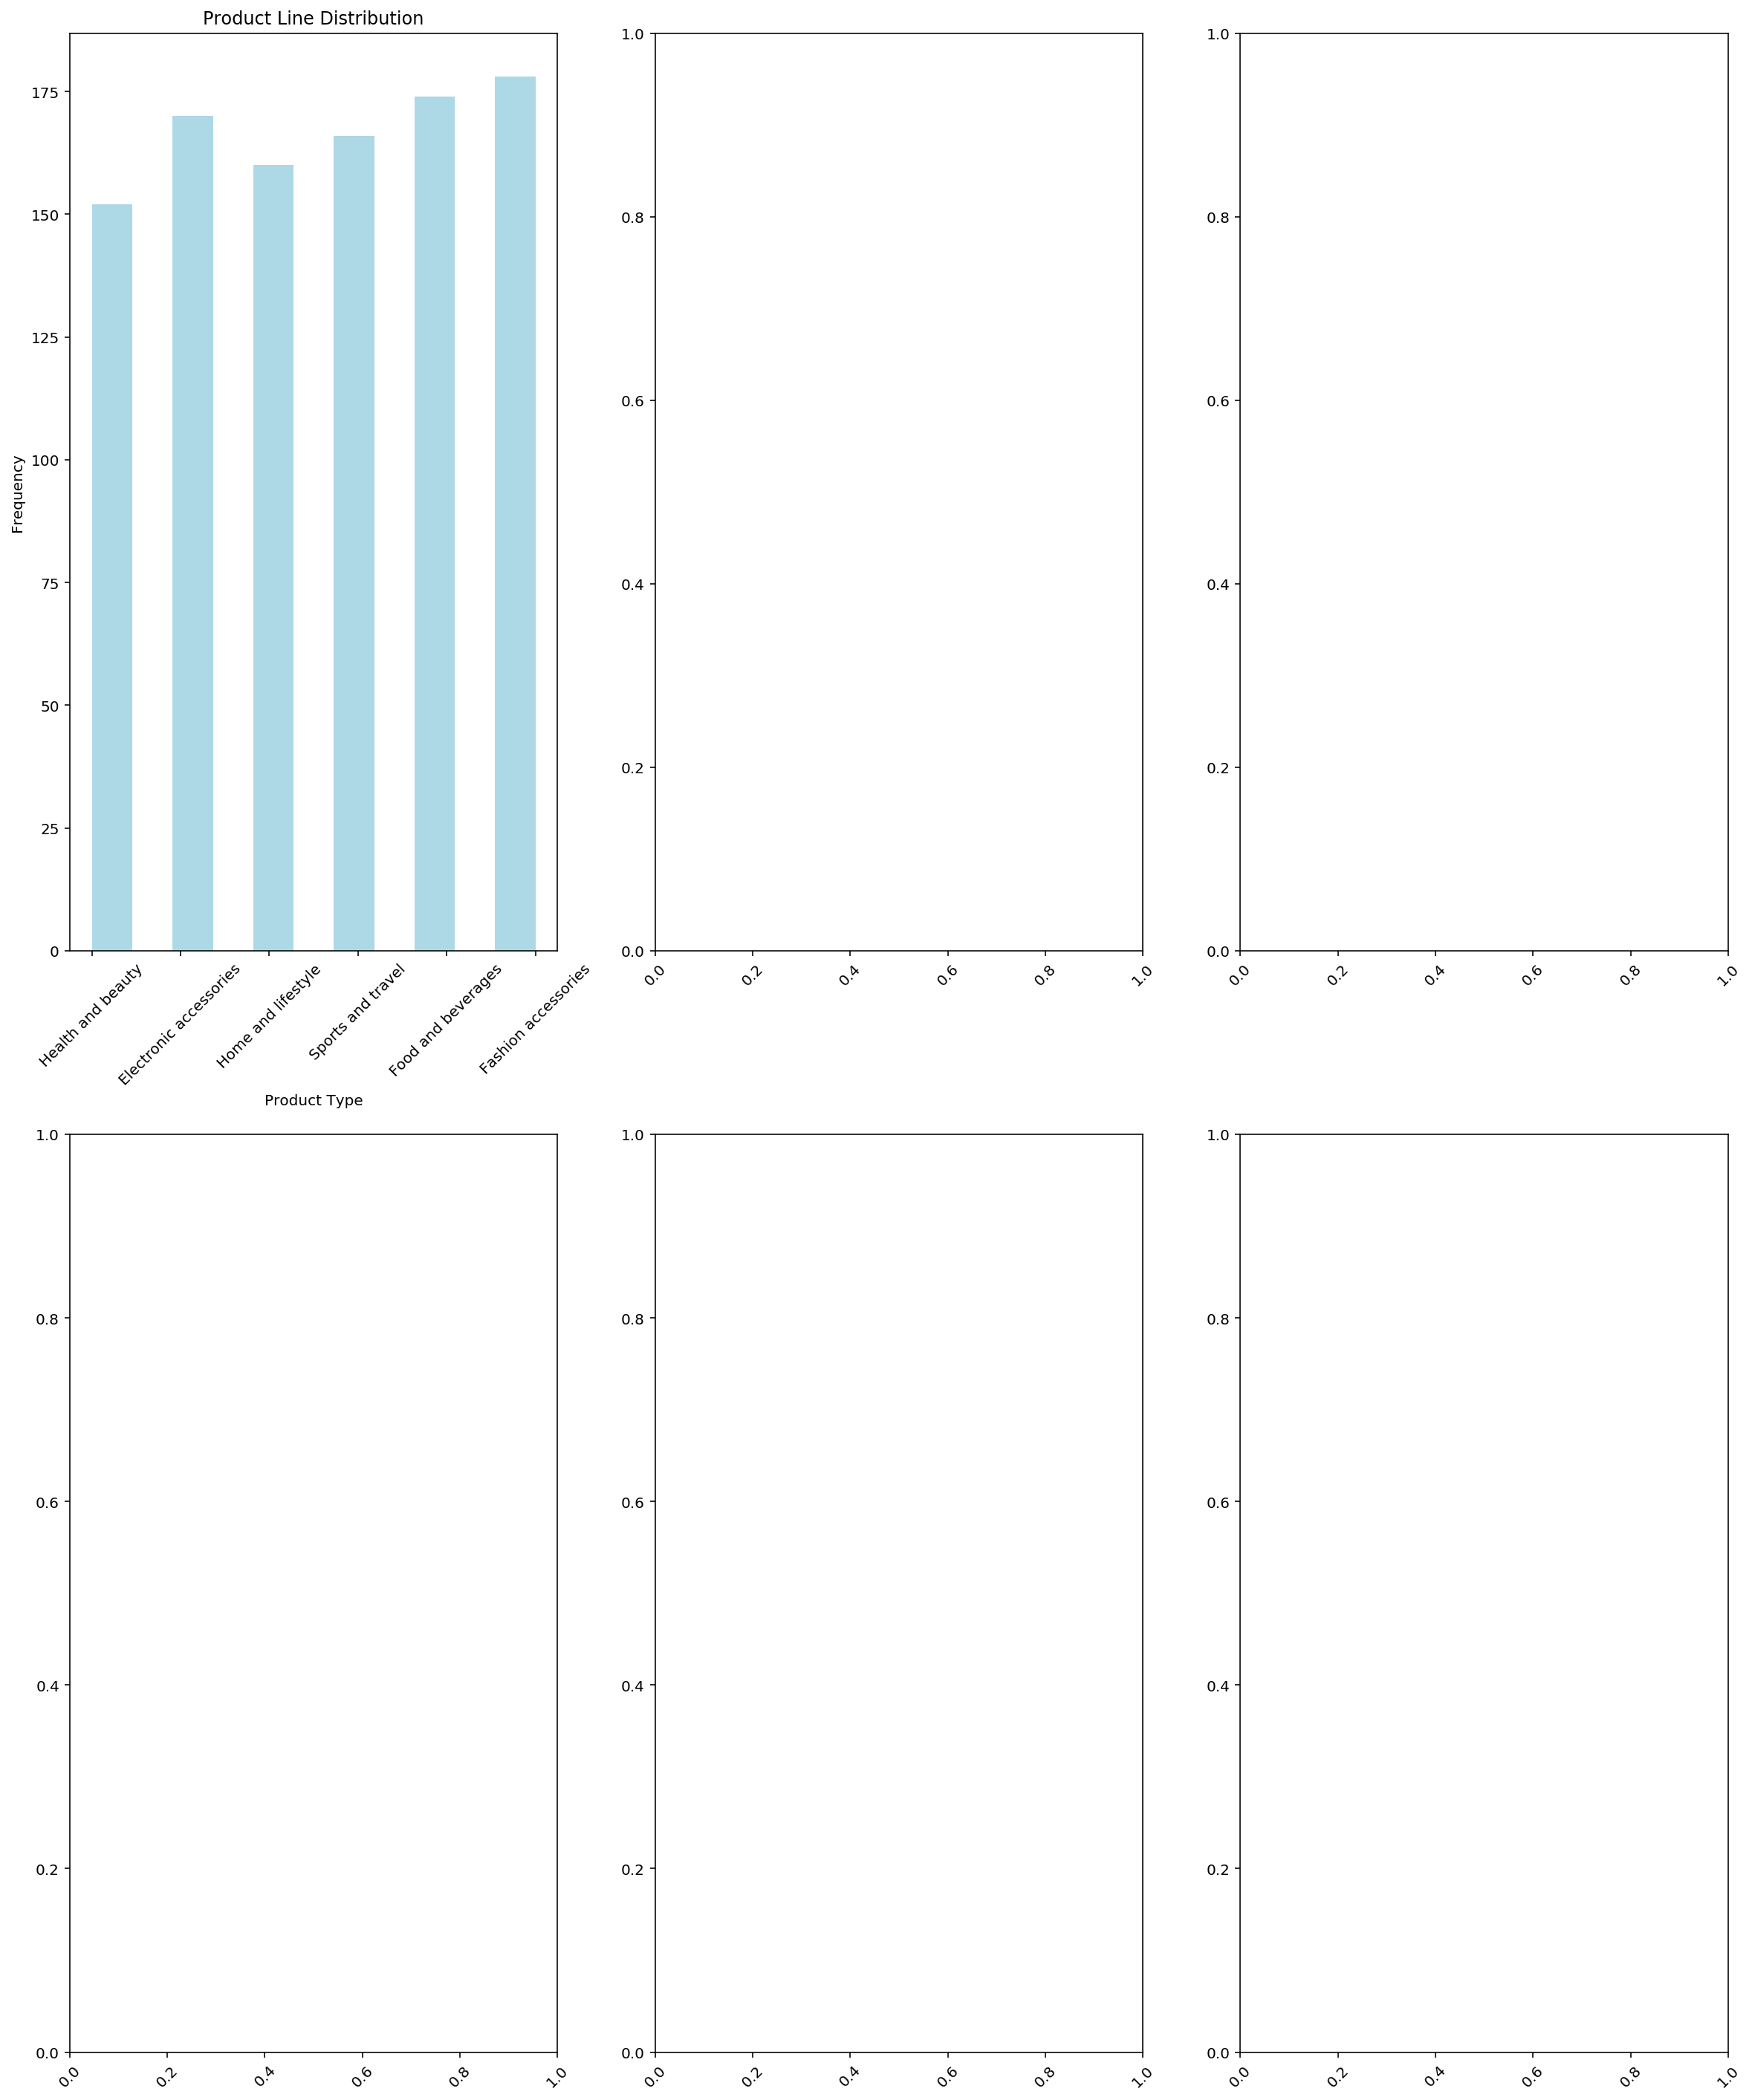

In [8]:
# Distributions
fig, axs = plt.subplots(nrows=2, ncols=3, figsize = (20,25))

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

axs[0, 0].hist(retail['Product line'], color = 'lightblue', bins = 11)
axs[0, 0].set_xlabel('Product Type')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Product Line Distribution')

axs[0, 1].hist(retail_original['Payment'], color = 'silver')
axs[0, 1].set_xlabel('Payment type')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Payment Distribution')

axs[0, 2].hist(retail_original['Rating'], color = 'wheat', bins = 20)
axs[0, 2].axvline(retail_original['Rating'].mean(), color='k', linestyle='dashed', linewidth=1)
axs[0, 2].set_xlabel('Rating')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_title('Rating Distribution')

axs[1, 0].hist(retail_original['Branch'], color = 'salmon', bins = 11)
axs[1, 0].set_xlabel('Branch')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Branch Distribution')

axs[1, 1].hist(retail_original['Unit price'], color = 'teal', bins = 20)
axs[1, 1].axvline(retail_original['Unit price'].mean(), color='k', linestyle='dashed', linewidth=1)
axs[1, 1].set_xlabel('Unit price')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Unit price Distribution')

axs[1, 2].hist(retail_original['Hour'], color = 'lavender', bins = 10)
axs[1, 2].set_xlabel('Hour')
axs[1, 2].set_ylabel('Frequency')
axs[1, 2].set_title('Hour Distribution')

plt.show()